In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_modelling.csv')
dataset.head(10)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,808,55,4,2611.38,4,1,0,103400.37,1
1,2,770,30,6,25336.88,4,0,0,150188.51,0
2,3,756,69,8,104987.79,1,0,0,51200.67,1
3,4,502,51,9,124961.89,3,1,1,13323.56,1
4,5,574,50,4,61537.81,2,1,0,123833.92,1
5,6,428,18,6,171827.45,3,0,1,168586.48,1
6,7,697,51,7,165854.08,1,1,1,125872.70,0
7,8,810,51,0,77087.75,4,0,1,170869.63,0
8,9,397,47,2,94177.67,4,0,0,14048.49,1
9,10,359,56,1,179846.36,4,0,0,66121.84,0


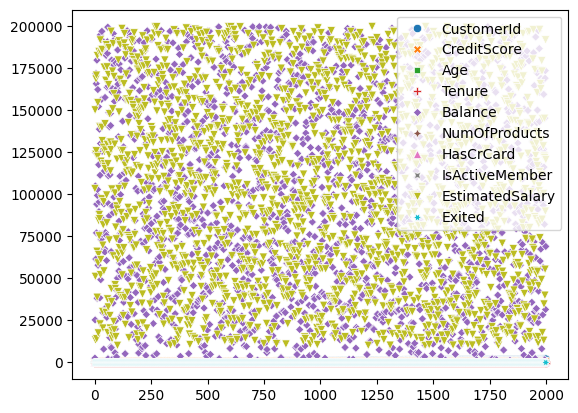

In [3]:
sns.scatterplot(data=dataset)
plt.show()

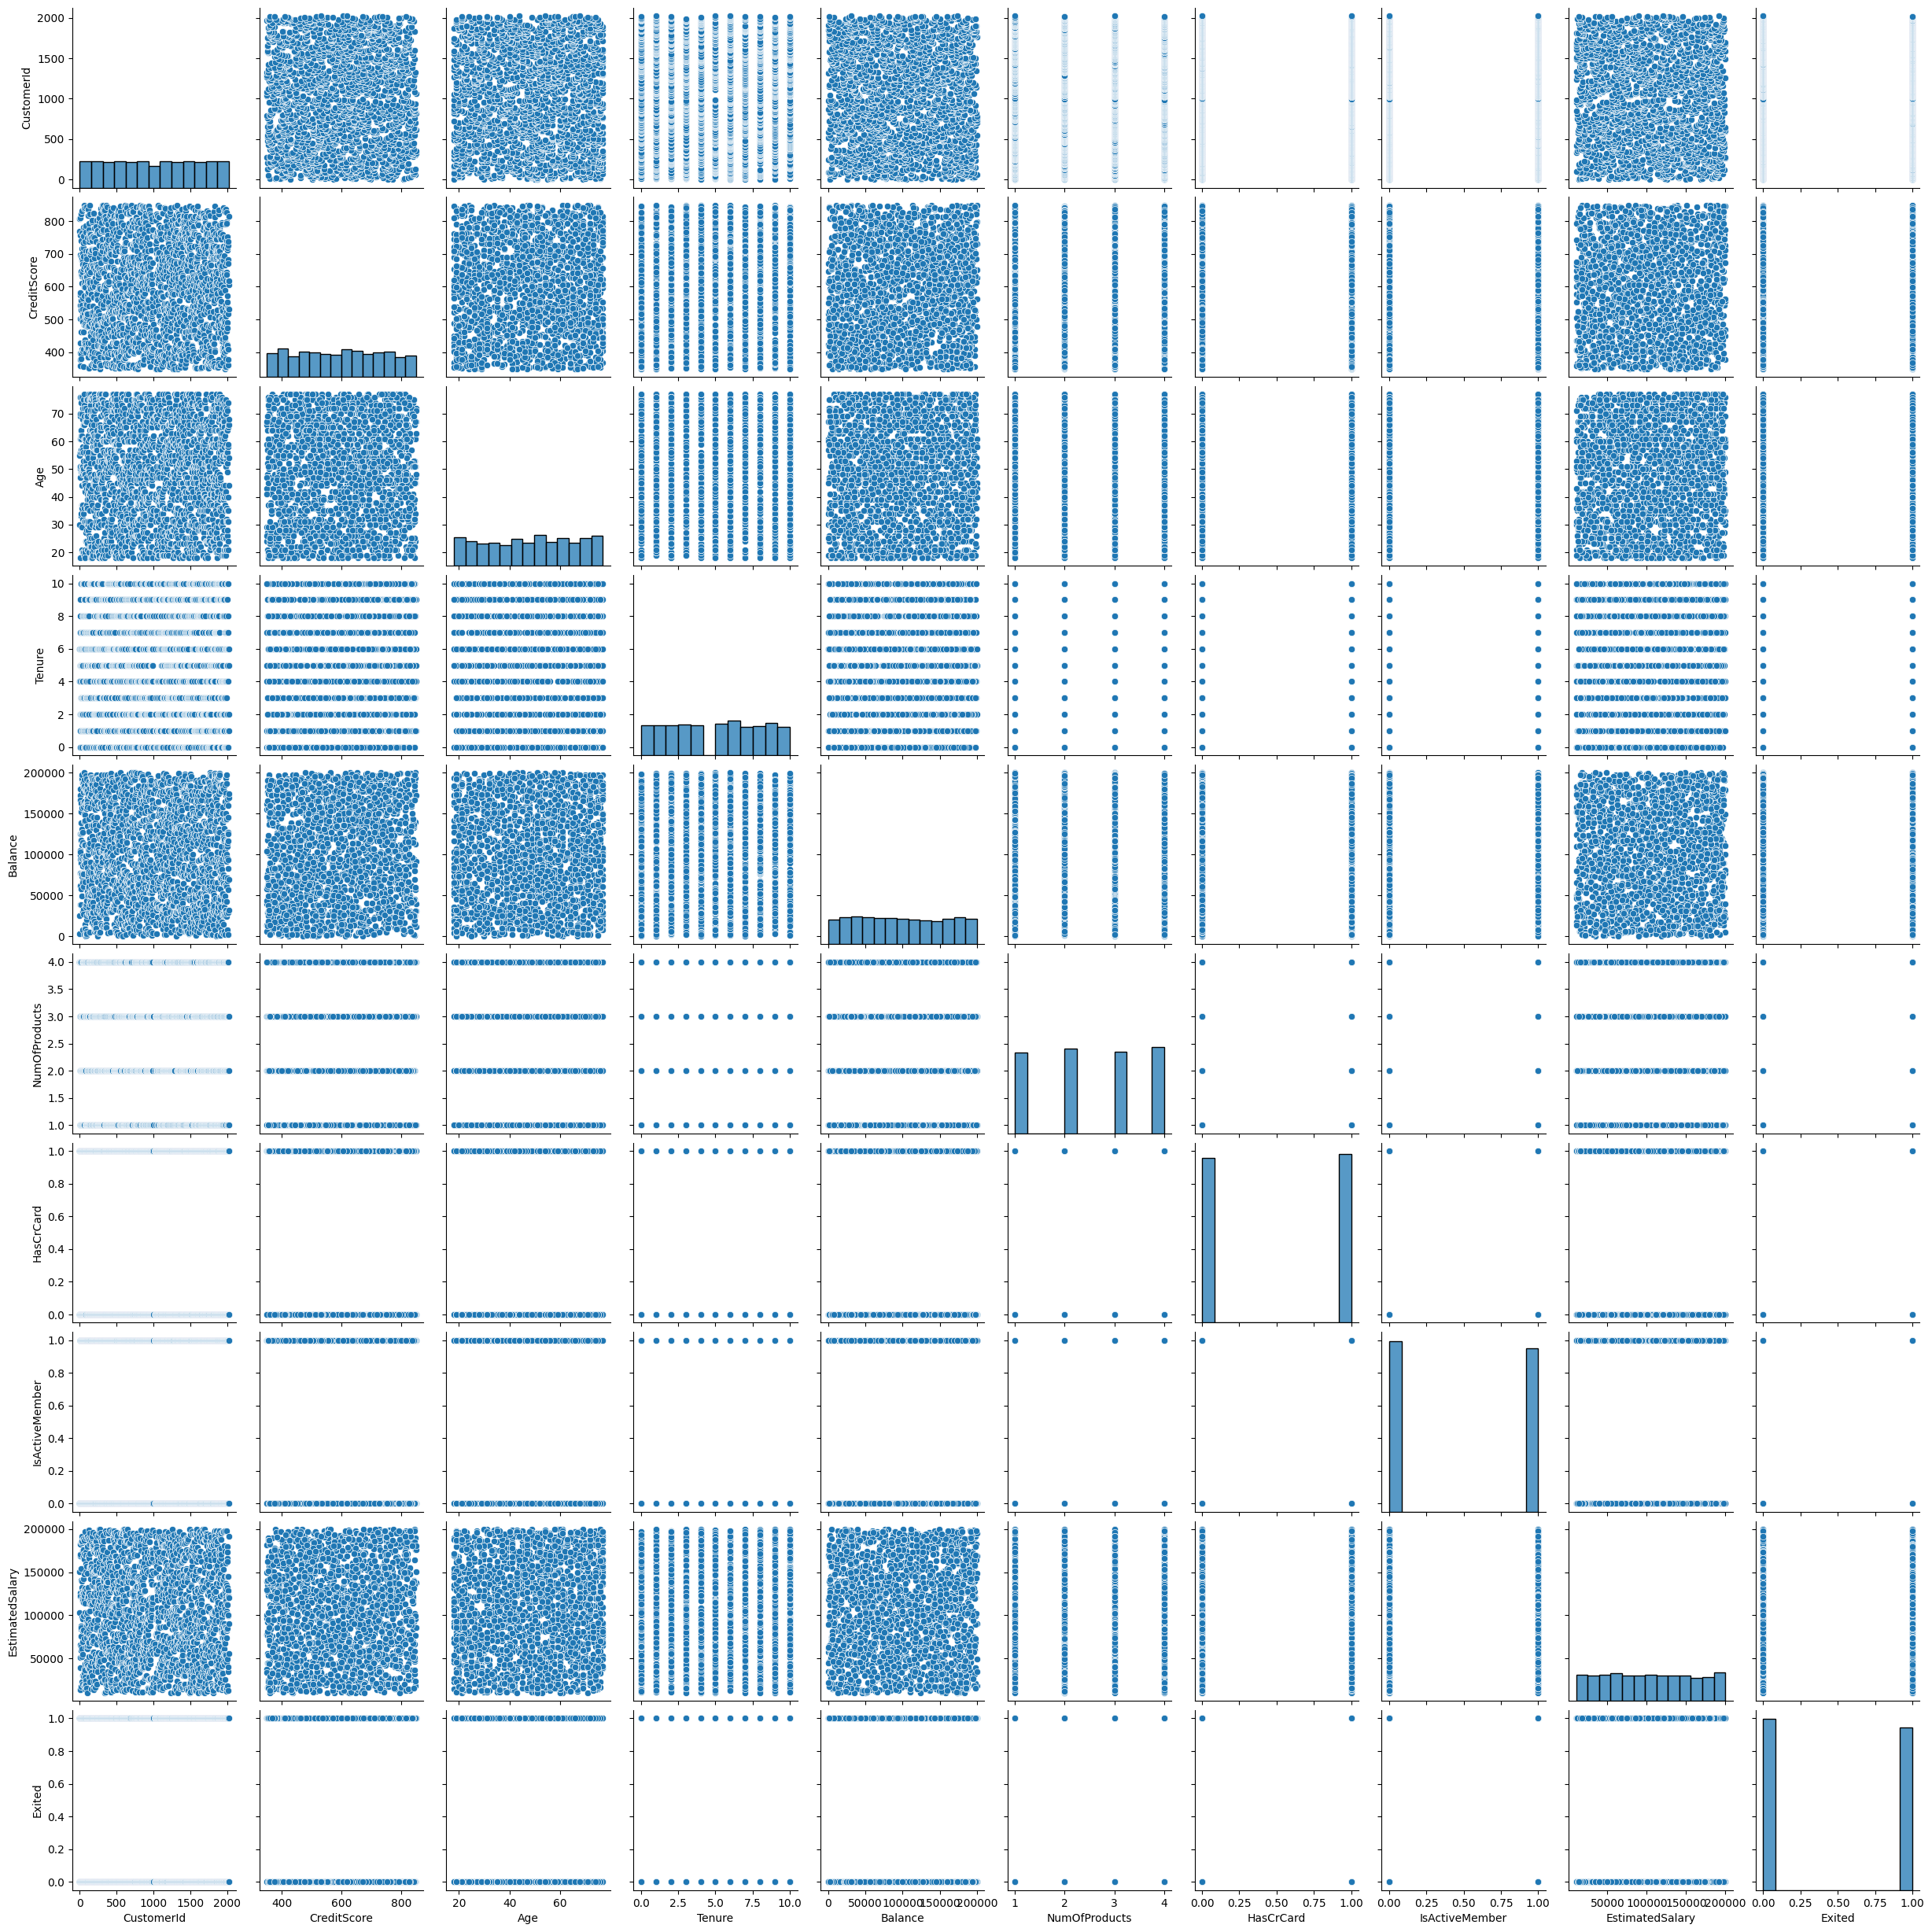

In [4]:
sns.pairplot(data=dataset)
plt.show()

In [5]:
dataset.isnull().sum()

,0
CustomerId,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [6]:
input_data = dataset.iloc[:,:-1]
output_data = dataset.iloc[:,-1]


In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data), columns=dataset.columns[:-1])

In [8]:
input_data

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-1.721327,1.502080,0.392304,-0.321839,-1.670930,1.324033,0.988071,-0.979216,-0.015336
1,-1.719624,1.234479,-1.050522,0.317365,-1.277245,1.324033,-1.012073,-0.979216,0.831231
2,-1.717922,1.135888,1.200287,0.956569,0.102585,-1.355292,-1.012073,-0.979216,-0.959817
3,-1.716219,-0.652818,0.161452,1.276172,0.448606,0.430925,0.988071,1.021225,-1.645152
4,-1.714516,-0.145783,0.103739,-0.321839,-0.650119,-0.462184,0.988071,-0.979216,0.354381
...,...,...,...,...,...,...,...,...,...
1995,1.714516,-0.554228,1.027148,-1.600248,0.802254,0.430925,0.988071,-0.979216,-1.162738
1996,1.716219,1.551375,1.027148,-0.961044,1.212957,-0.462184,0.988071,1.021225,-0.883210
1997,1.717922,0.072524,0.334591,-0.002237,1.291031,0.430925,0.988071,1.021225,-0.258034
1998,1.719624,-0.448596,-0.242539,-1.280646,-1.169849,0.430925,-1.012073,1.021225,1.585596


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

In [10]:
x_train.shape

(1600, 9)

In [11]:
import tensorflow

In [12]:
from keras.layers import Dense
from keras.models import Sequential

In [13]:
ann = Sequential()

In [14]:
ann.add(Dense(units=6, input_dim=9, activation='relu'))
ann.add(Dense(units=4, activation='relu'))
ann.add(Dense(units=2, activation='relu'))
#ann.add(Dense(units=1, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
ann.fit(x_train, y_train, batch_size=100,epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5461 - loss: 0.6875 - val_accuracy: 0.4875 - val_loss: 0.7027
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5380 - loss: 0.6880 - val_accuracy: 0.4800 - val_loss: 0.7028
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5597 - loss: 0.6859 - val_accuracy: 0.4825 - val_loss: 0.7028
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5538 - loss: 0.6886 - val_accuracy: 0.4825 - val_loss: 0.7029
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5387 - loss: 0.6906 - val_accuracy: 0.4850 - val_loss: 0.7031
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5464 - loss: 0.6832 - val_accuracy: 0.4800 - val_loss: 0.7037
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5682 - loss: 0.6830 - val_accuracy: 0.4825 - val_loss: 0.7038
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5668 - loss: 0.6836 - val_accuracy: 0.

In [27]:
ann.history.history

{'accuracy': [0.5506250262260437,
  0.5512499809265137,
  0.5537499785423279,
  0.5518749952316284,
  0.5531250238418579,
  0.5543749928474426,
  0.5543749928474426,
  0.5543749928474426,
  0.5493749976158142,
  0.5518749952316284,
  0.5518749952316284,
  0.5518749952316284,
  0.5543749928474426,
  0.5537499785423279,
  0.5531250238418579,
  0.5537499785423279,
  0.5525000095367432,
  0.5556250214576721,
  0.5556250214576721,
  0.5556250214576721,
  0.5537499785423279,
  0.5487499833106995,
  0.5518749952316284,
  0.5512499809265137,
  0.5543749928474426,
  0.5512499809265137,
  0.5518749952316284,
  0.5506250262260437,
  0.5512499809265137,
  0.5518749952316284,
  0.5550000071525574,
  0.5556250214576721,
  0.5525000095367432,
  0.5506250262260437,
  0.5531250238418579,
  0.5525000095367432,
  0.5537499785423279,
  0.5487499833106995,
  0.5506250262260437,
  0.5512499809265137,
  0.5512499809265137,
  0.5518749952316284,
  0.5512499809265137,
  0.5487499833106995,
  0.5493749976158142

In [28]:
train_accuracy = ann.history.history['accuracy']
test_accuracy = ann.history.history['val_accuracy']

In [31]:
len(test_accuracy)

100

In [32]:
len(train_accuracy)

100

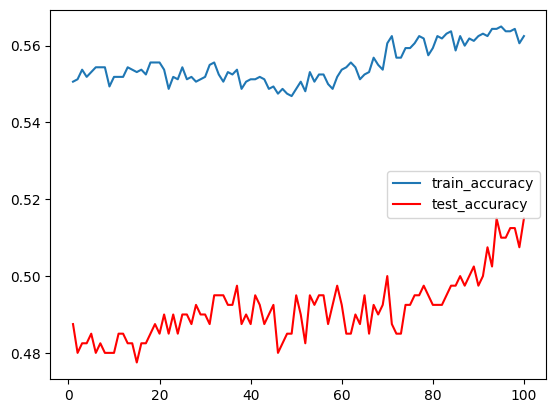

In [34]:
plt.plot([i for i in range(1,101)], train_accuracy, label='train_accuracy')
plt.plot([i for i in range(1,101)], test_accuracy, label='test_accuracy', c='red')
plt.legend()
plt.show()

In [16]:
ann.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4954 - loss: 0.6960  


[0.7025482058525085, 0.48500001430511475]

In [17]:
prd = ann.predict(x_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [18]:
prd1 = ann.predict(x_train)
prd_data1 = []
for i in prd1:
  if i > 0.5 :
    prd_data1.append(1)
  else :
    prd_data1.append(0)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [19]:
prd = ann.predict(x_test)
prd_data = []
for i in prd :
  if i > 0.5 :
    prd_data.append(1)
  else :
    prd_data.append(0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [20]:
prd_data = np.array(prd_data)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, prd_data)*100
#

48.5

In [23]:
accuracy_score(y_train, prd_data1)*100

55.43749999999999

In [39]:
from keras.regularizers import l2

In [40]:
ann.add(Dense(units=6, input_dim=9, activation='relu', kernel_regularizer=l2(l2=0.01)))
ann.add(Dense(units=4, activation='relu'))
ann.add(Dense(units=2, activation='relu'))
#ann.add(Dense(units=1, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
from keras.callbacks import EarlyStopping

In [48]:
ann.fit(x_train, y_train, batch_size=100,epochs=100, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5052 - loss: 0.7212 - val_accuracy: 0.4900 - val_loss: 0.7143
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5375 - loss: 0.7123 - val_accuracy: 0.4900 - val_loss: 0.7138
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5223 - loss: 0.7079 - val_accuracy: 0.4900 - val_loss: 0.7133
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5414 - loss: 0.7055 - val_accuracy: 0.4900 - val_loss: 0.7129
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5195 - loss: 0.7064 - val_accuracy: 0.4900 - val_loss: 0.7124
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5097 - loss: 0.7056 - val_accuracy: 0.4900 - val_loss: 0.7117
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5150 - loss: 0.7054 - val_accuracy: 0.4900 - val_loss: 0.7115
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5306 - loss: 0.7037 - val_accuracy: 0.4900 -

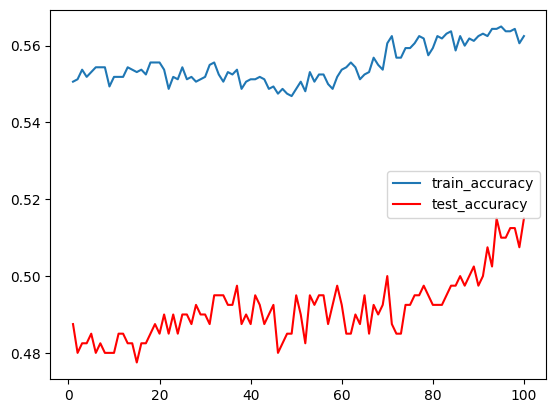

In [67]:
plt.plot([i for i in range(1,101)], train_accuracy, label='train_accuracy')
plt.plot([i for i in range(1,101)], test_accuracy, label='test_accuracy', c='red')
plt.legend()
plt.show()

In [68]:
from keras.layers import BatchNormalization, Dropout

In [69]:
ann.add(Dense(units=7, input_dim=9, activation='relu', kernel_regularizer=l2(l2=0.01)))
ann.add(BatchNormalization())
ann.add(Dropout(0.2))
ann.add(Dense(units=6, activation='relu'))
ann.add(Dense(units=5, activation='relu'))
ann.add(Dropout(0.2))
ann.add(BatchNormalization())
ann.add(Dense(units=4, activation='relu'))
ann.add(Dropout(0.2))
ann.add(BatchNormalization())
ann.add(Dense(units=3, activation='relu'))
ann.add(Dropout(0.2))
ann.add(BatchNormalization())
ann.add(Dense(units=2, activation='relu'))
#ann.add(Dense(units=1, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
ann.fit(x_train, y_train, batch_size=10,epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.5174 - loss: 0.6934 - val_accuracy: 0.4900 - val_loss: 0.6950
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5334 - loss: 0.6919 - val_accuracy: 0.4900 - val_loss: 0.6952
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5089 - loss: 0.6942 - val_accuracy: 0.4900 - val_loss: 0.6952
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5192 - loss: 0.6930 - val_accuracy: 0.4900 - val_loss: 0.6952
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5517 - loss: 0.6905 - val_accuracy: 0.4900 - val_loss: 0.6952
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5178 - loss: 0.6933 - val_accuracy: 0.4900 - val_loss: 0.6956
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4981 - loss: 0.6946 - val_accuracy: 0.4900 - val_loss: 0.6954
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5164 - loss: 0.6930 -

In [74]:
accuracy_score(y_train, prd_data1)*100

55.43749999999999

In [75]:
accuracy_score(y_test, prd_data)*100
#

48.5